In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# ---------Load data---------

In [5]:
raw_data = pd.read_csv('./1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# ---------Preprocessing data---------


In [7]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [15]:
len(raw_data)

4345

In [17]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [18]:
data_no_missing_value = raw_data.dropna(axis=0)

In [19]:
data_no_missing_value.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [20]:
len(data_no_missing_value)

4025

# ---------Explore PDFs---------


/var/folders/vx/jfvnz6_s7cd9p604bj3hzbt80000gn/T/ipykernel_71515/3558549333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_missing_value['Price'])


<AxesSubplot:xlabel='Price', ylabel='Density'>

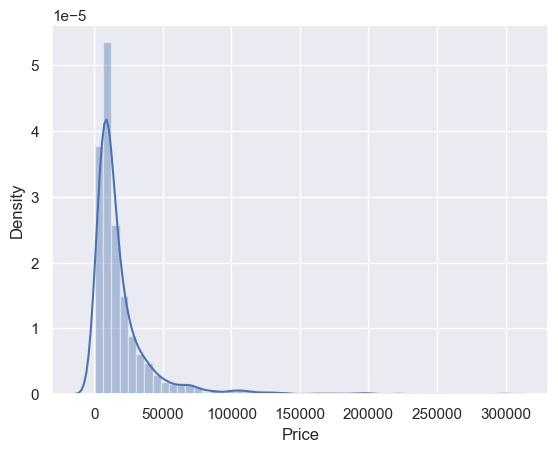

In [25]:
sns.distplot(data_no_missing_value['Price'])

/var/folders/vx/jfvnz6_s7cd9p604bj3hzbt80000gn/T/ipykernel_71515/847519588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_missing_value['EngineV'])


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

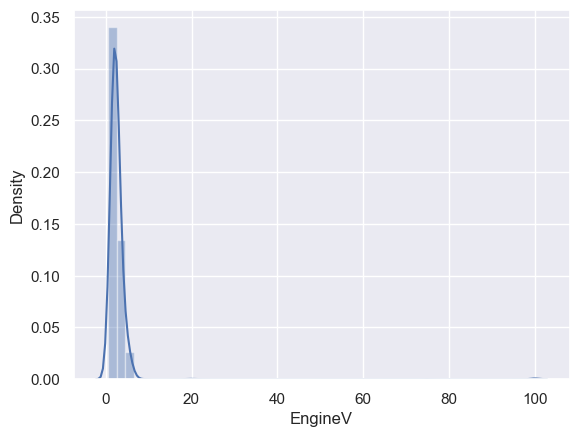

In [37]:
sns.distplot(data_no_missing_value['EngineV'])

# ---------Deal with outliers---------

In [45]:
q = data_no_missing_value['Price'].quantile(0.99)
q

129812.51999999981

In [46]:
data1 = data_no_missing_value[data_no_missing_value['Price']<q]


In [47]:
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [48]:
data2 = data1[data1['EngineV']<6.5]

/var/folders/vx/jfvnz6_s7cd9p604bj3hzbt80000gn/T/ipykernel_71515/252089099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['EngineV'])


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

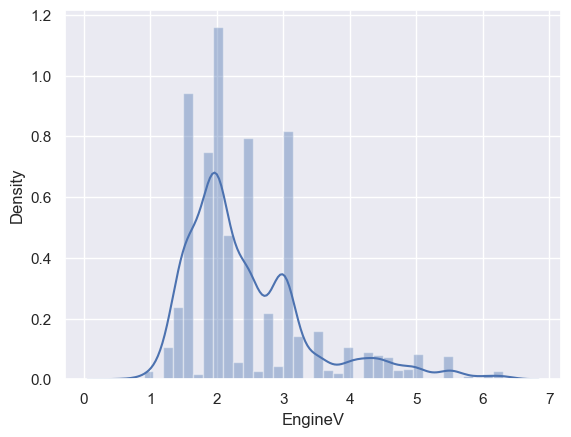

In [49]:
sns.distplot(data2['EngineV'])

In [50]:
q = data2['Year'].quantile(0.01)
data3 = data2[data2['Year']>q]

/var/folders/vx/jfvnz6_s7cd9p604bj3hzbt80000gn/T/ipykernel_71515/2986863428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['Year'])


<AxesSubplot:xlabel='Year', ylabel='Density'>

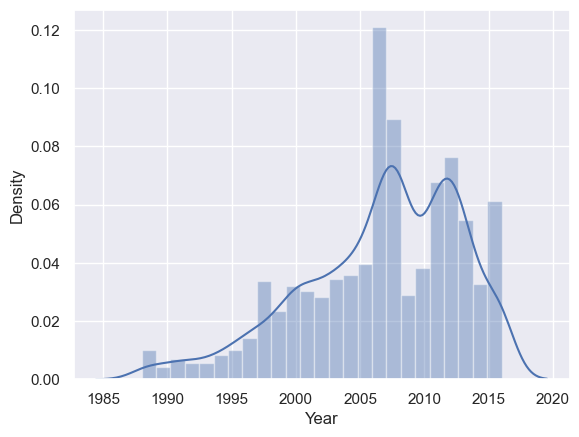

In [51]:
sns.distplot(data3['Year'])

In [52]:
data3

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [53]:
data_cleaned = data3.reset_index(drop=True)

In [56]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3905,3905.000000,3905,3905.000000,3905.000000,3905,3905,3905.000000,3905
unique,7,NaN,6,NaN,NaN,4,2,NaN,295
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,861,NaN,1482,NaN,NaN,1835,3540,NaN,183
mean,NaN,18100.297083,NaN,164.107298,2.449795,NaN,NaN,2006.620487,NaN
std,NaN,19056.178291,NaN,102.377608,0.947793,NaN,NaN,6.173623,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7150.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# ------OLS Assumption--------

In [57]:
# first check scatter plot of Price vs Engine, Price vs Mileage, Price vs Year
# if the scatter plot is exponetial we should convert the price feature to Log(price)

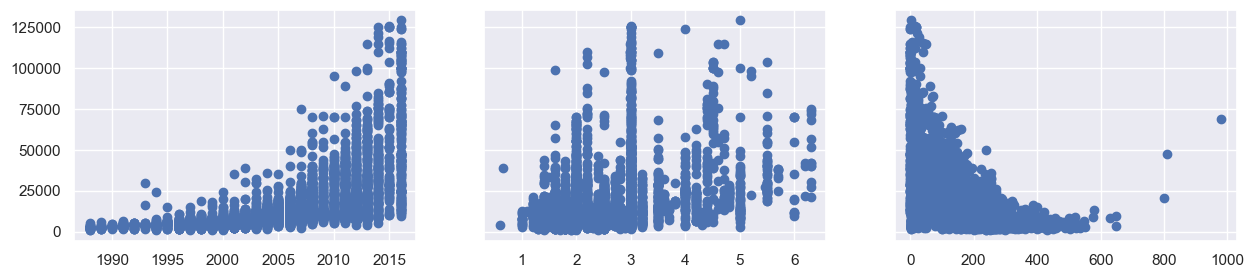

In [62]:
#plot the scatterplot
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])

In [ ]:
# since scatter plot is exponetial we do log of price (dependent variable)

In [63]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price

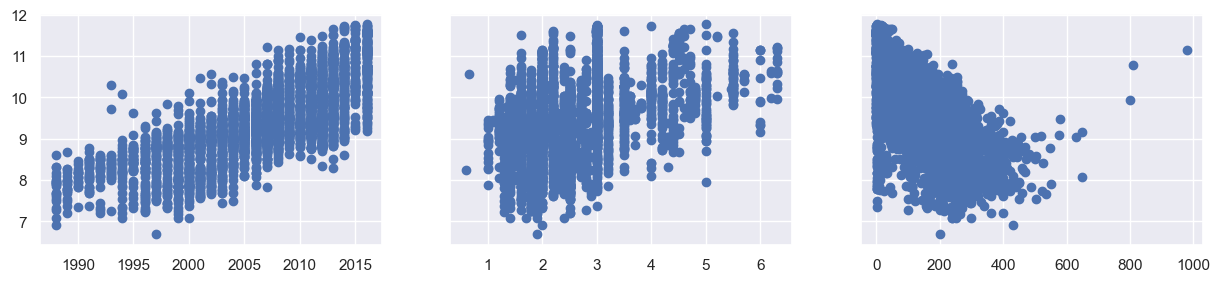

In [64]:
#plot the scatterplot
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["log_price"])
ax2.scatter(data_cleaned["EngineV"],data_cleaned["log_price"])
ax3.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])

In [65]:
# after log convertion relation looks linear between dependent and independent variables

In [66]:
data_cleaned = data_cleaned.drop(['Price'],axis=1) # drop price column 
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3900,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3901,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3902,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3903,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557


In [69]:
# next check for multicollinearity using VIF(variance inflation factor)
#if VIF >6 : drop the column

In [81]:
data_cleaned = data_cleaned.drop(["Year"],axis=1)


KeyError: "['Year'] not found in axis"

# -------- Handle categorical data----------

In [82]:
data_cleaned = data_cleaned.drop(["Model"],axis=1)
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [83]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [84]:
cols=['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [85]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# ----Linear Regression Model-------

In [88]:
# declare input and target
target = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [90]:
# scale the input data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [91]:
input_scaled = scaler.transform(inputs)

In [92]:
# split data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(input_scaled,target,test_size=0.2,random_state=365)

In [94]:
# create regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [95]:
y_hat = reg.predict(x_train)

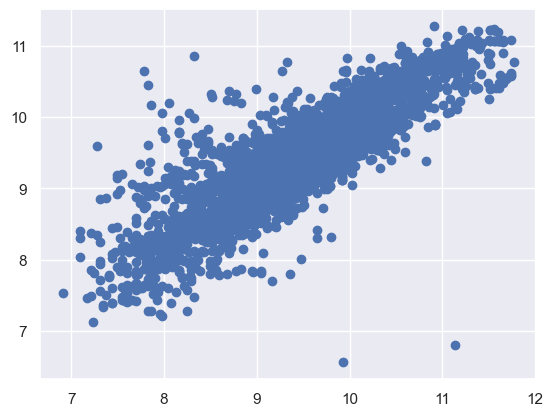

In [96]:
plt.scatter(y_train,y_hat)

In [97]:
reg.score(x_train,y_train)

0.7339089649912188